<a href="https://colab.research.google.com/github/dmaresza/tensorflow_course/blob/main/08_TensorFlow_NLP_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Natural Language Processing Exercises

## 1. Rebuild, compile, and train `model_1`, `model_2`, and `model_5` using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) instead of the functional API.

In [1]:
# Useful imports
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers

In [2]:
# Import helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, make_confusion_matrix

--2024-07-24 18:26:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-24 18:26:24 (21.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



The dataset used is Kaggle's introduction to NLP dataset (text samples of Tweets labeled as disaster or not disaster).

In [3]:
# Get the data
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")
!rm nlp_getting_started.zip

--2024-07-24 18:26:26--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2024-07-24 18:26:26 (74.5 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
# Create DataFrames for the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Shuffle training DataFrame
train_df_shuffled = train_df.sample(frac=1, random_state=42)

In [5]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state=42)

In [6]:
# Set up text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be

# Create text vectorizer
text_vectorizer = layers.TextVectorization(max_tokens=max_vocab_length,
                                           output_mode="int",
                                           output_sequence_length=max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [7]:
# Create embedding layer
embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # output shape
                             input_length=max_length) # how long is each input

In [8]:
# Recreate model_1 (Feed-forward neural network)
model_1 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string),
    text_vectorizer,
    embedding,
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation="sigmoid")
], name="sequential_model_1")

# Compile model_1
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 31ms/step - loss: 0.6144 - accuracy: 0.6936 - val_loss: 0.5386 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4433 - accuracy: 0.8199 - val_loss: 0.4702 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 11ms/step - loss: 0.3482 - accuracy: 0.8606 - val_loss: 0.4559 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2847 - accuracy: 0.8910 - val_loss: 0.4631 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2386 - accuracy: 0.9123 - val_loss: 0.4834 - val_accuracy: 0.7795


In [9]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7795


[0.48341548442840576, 0.7795275449752808]

In [10]:
# Recreate model_2 (LSTM model)
model_2 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string),
    text_vectorizer,
    embedding,
    layers.LSTM(64),
    layers.Dense(1, activation="sigmoid")
], name="sequential_model_2")

# Compile model_2
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train model_2
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 11s 39ms/step - loss: 0.2265 - accuracy: 0.9212 - val_loss: 0.5574 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1562 - accuracy: 0.9419 - val_loss: 0.7701 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1295 - accuracy: 0.9512 - val_loss: 0.6402 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1048 - accuracy: 0.9622 - val_loss: 0.7733 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0847 - accuracy: 0.9660 - val_loss: 0.8902 - val_accuracy: 0.7743


In [11]:
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.8902 - accuracy: 0.7743


[0.890214741230011, 0.7742782235145569]

In [12]:
# Recreate model_5 (1D Convolutional Neural Network)
model_5 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string),
    text_vectorizer,
    embedding,
    layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid"),
    layers.GlobalMaxPool1D(),
    layers.Dense(1, activation="sigmoid")
], name="sequential_model_5")

# Compile model_5
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train model_5
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 37ms/step - loss: 0.1565 - accuracy: 0.9461 - val_loss: 0.7770 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1030 - accuracy: 0.9603 - val_loss: 0.8638 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0810 - accuracy: 0.9695 - val_loss: 0.9636 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0680 - accuracy: 0.9745 - val_loss: 1.0474 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0607 - accuracy: 0.9766 - val_loss: 1.0862 - val_accuracy: 0.7638


In [13]:
model_5.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.0862 - accuracy: 0.7638


[1.0861669778823853, 0.7637795209884644]

When the models were created using the Keras Functional API, the models achieved the following accuracy scores when predicting on the validation data:

* Feed-forward neural network: ~77.82%
* LSTM model: ~77.69%
* Conv1D model: ~75.46%

Using the Sequential API, the accuracy results were:

* Feed-forward neural network: ~77.95%
* LSTM model: ~77.43%
* Conv1D model: ~76.38%

There's no significant difference in the models' performance, which is to be expected because they're supposed to be the same models, just created in different ways. The small differences in accuracy values can likely be attributed to the inherent randomness of how neural networks learn.

## 2. Combine the ensemble predictions using the majority vote (mode). How does this perform compared to averaging the prediction probabilities of each model?

In [26]:
test_sentences = test_df["text"].to_numpy()

# Use all 3 models to predict on the test data
model_1_preds = tf.cast(tf.squeeze(tf.round(model_1.predict(test_sentences))), dtype=tf.int32)
model_2_preds = tf.cast(tf.squeeze(tf.round(model_2.predict(test_sentences))), dtype=tf.int32)
model_5_preds = tf.cast(tf.squeeze(tf.round(model_5.predict(test_sentences))), dtype=tf.int32)

# Create a DataFrame for the predictions
preds_df = pd.DataFrame({'dense_model': model_1_preds,
                         'LSTM_model': model_2_preds,
                         'Conv1D_model': model_5_preds})

# # Find the mode for predictions
preds_df['majority_vote_preds'] = preds_df.mode(axis=1)

# Print out value counts for each model, and for the mode
for col in preds_df:
  print(preds_df[col].value_counts())

102/102 [==============================] - 0s 3ms/step
dense_model
0    2056
1    1207
Name: count, dtype: int64
LSTM_model
0    1952
1    1311
Name: count, dtype: int64
Conv1D_model
0    1952
1    1311
Name: count, dtype: int64
majority_vote_preds
0    2018
1    1245
Name: count, dtype: int64


I'm not completely sure what the question is asking for in terms of "how does this perform". Since I don't have the "true" labels for the test data, it's impossible to know how accurate the models are, and how much more or less accurate the mode would be compared to the models.

## 3. Retrain the baseline model with 10% of the training data. How does it perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [14]:
# Get 10% of the training data
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [15]:
# Recreate baseline model (Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert words to numbers)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modeling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to 10% of the training data
model_0.fit(train_sentences_10_percent, train_labels_10_percent)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [16]:
model_0.score(val_sentences, val_labels)

0.7020997375328084

In [17]:
import tensorflow_hub as hub

# Create a Keras Layer using the USE pretrained layer from TensorFlow Hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [18]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model to 10% of the training data
model_6_history = model_6.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 7s 41ms/step - loss: 0.6750 - accuracy: 0.6584 - val_loss: 0.6555 - val_accuracy: 0.7008
Epoch 2/5
22/22 [==============================] - 0s 20ms/step - loss: 0.6066 - accuracy: 0.8102 - val_loss: 0.5979 - val_accuracy: 0.7546
Epoch 3/5
22/22 [==============================] - 0s 20ms/step - loss: 0.5303 - accuracy: 0.8219 - val_loss: 0.5382 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4654 - accuracy: 0.8307 - val_loss: 0.5060 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4242 - accuracy: 0.8277 - val_loss: 0.4923 - val_accuracy: 0.7664


In [19]:
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 17ms/step - loss: 0.4923 - accuracy: 0.7664


[0.4922623038291931, 0.7664042115211487]

Training on only 10% of the test data, the Naive Bayes baseline model only achieved a ~70.20% accuracy on the validation data, while the USE model achieved a ~76.64% accuracy.

## 4. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting `training=True` when instantiating it as a Keras layer.

In [20]:
# Make the USE layer trainable for fine-tuning
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True,
                                        name="USE")

# Rereate USE model
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(1, activation="sigmoid")
], name="model_7_USE")

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 125s 453ms/step - loss: 0.4638 - accuracy: 0.7942 - val_loss: 0.4248 - val_accuracy: 0.8150
Epoch 2/5
215/215 [==============================] - 29s 133ms/step - loss: 0.2490 - accuracy: 0.9076 - val_loss: 0.4643 - val_accuracy: 0.8294
Epoch 3/5
215/215 [==============================] - 25s 114ms/step - loss: 0.0866 - accuracy: 0.9737 - val_loss: 0.5740 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 23s 108ms/step - loss: 0.0477 - accuracy: 0.9861 - val_loss: 0.6176 - val_accuracy: 0.8058
Epoch 5/5
215/215 [==============================] - 23s 107ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.6657 - val_accuracy: 0.8136


In [21]:
model_7.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 18ms/step - loss: 0.6657 - accuracy: 0.8136


[0.6656606793403625, 0.8136482834815979]

When the USE model was used for feature extraction using its pretrained weights, it achieved an accuracy of ~81.23% when predicting on the validation data. When fine-tuning the model, the prediction accuracy was ~81.36%, which is practically the same. It seems that fine-tuning did not offer any significant improvements over the pretrained weights.

## 5. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

24/24 [==============================] - 0s 9ms/step


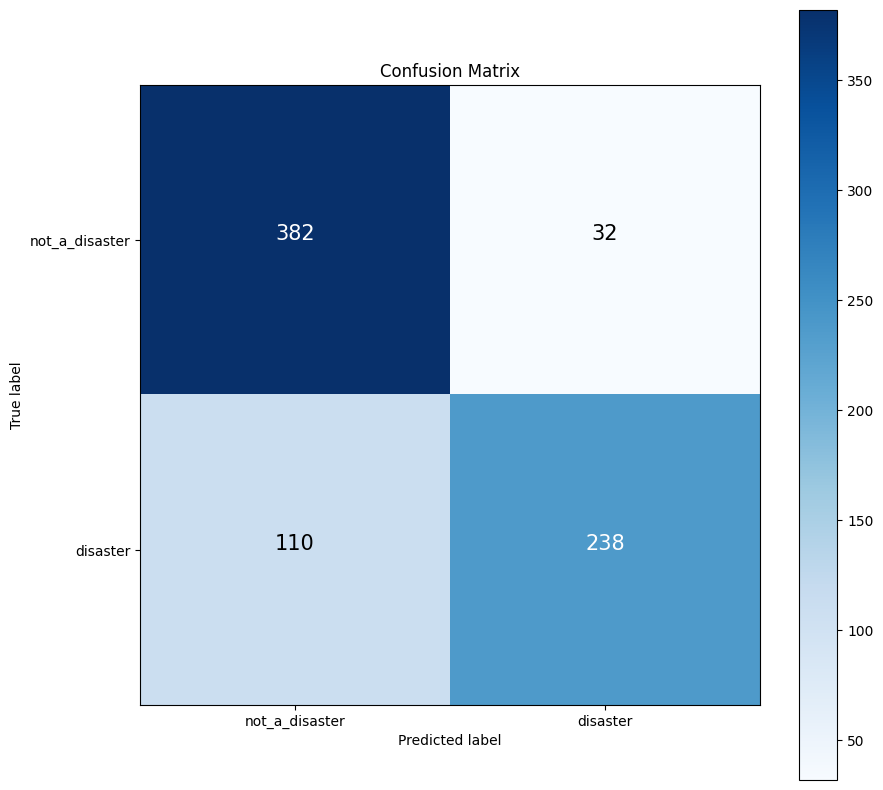

In [23]:
model_7_preds = tf.squeeze(tf.round(model_7.predict(val_sentences)))
class_names = ["not_a_disaster", "disaster"]

make_confusion_matrix(y_true=val_labels,
                      y_pred=model_7_preds,
                      classes=class_names)